__Project:__ Image Classification with TFDS data <br>
__Sub-prj:__ CNN with image resizing <br>
__Experm:__ ImageDataGenerator .flow method with image resizing <br>
__Contact:__ Amir Hossini <br>
__Dev Dat:__ Oct 25, 2021 <br>

In [105]:
import scipy
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [25]:
beans, info = tfds.load("beans", with_info=True, as_supervised=True)
images_train=[]
labels_train=[]
images_valid=[]
labels_valid=[]
images_test=[]
labels_test=[]

training_data   = beans['train']
validation_data = beans['validation']
testing_data    = beans['test']

In [26]:
for i, l in training_data:
    images_train.append(i.numpy())
    labels_train.append(l.numpy())

images_train=np.array(images_train)
labels_train=np.array(labels_train)

for i, l in validation_data:
    images_valid.append(i.numpy())
    labels_valid.append(l.numpy())

images_valid=np.array(images_valid)
labels_valid=np.array(labels_valid)

for i, l in testing_data:
    images_test.append(i.numpy())
    labels_test.append(l.numpy())

images_test=np.array(images_test)
labels_test=np.array(labels_test)

In [92]:
new_size=(150,150)
images_train_resized = np.array([np.array((Image.fromarray(image)).resize(new_size, Image.BICUBIC)) for image in images_train])
images_valid_resized = np.array([np.array((Image.fromarray(image)).resize(new_size, Image.BICUBIC)) for image in images_valid])
images_test_resized = np.array([np.array((Image.fromarray(image)).resize(new_size, Image.BICUBIC)) for image in images_test])

In [94]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )
valid_datagen = ImageDataGenerator(
    rescale = 1/255
)
test_datagen = ImageDataGenerator(
    rescale = 1/255
)

In [95]:
train_gen = train_datagen.flow(images_train_resized,labels_train,batch_size=64)
valid_gen = valid_datagen.flow(images_valid_resized,labels_valid,batch_size=64)
test_gen  = test_datagen.flow(images_test_resized,labels_test,batch_size=64)

In [96]:
def model_compile(num_classes,img_height, img_width):
    model = Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes, activation=tf.keras.activations.softmax)
    ])
    
    print(model.summary())

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [102]:
img_height  = images_train_resized.shape[1]
img_width   = images_train_resized.shape[2]
num_classes = len(np.unique(labels_train))

model       = model_compile(num_classes,img_height, img_width)
history     = model.fit(train_gen, validation_data=test_gen,epochs=20)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 41472)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               21234176  
_________________________________________________________________
dense_27 (Dense)             (None, 3)               

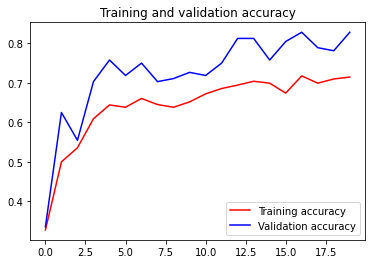

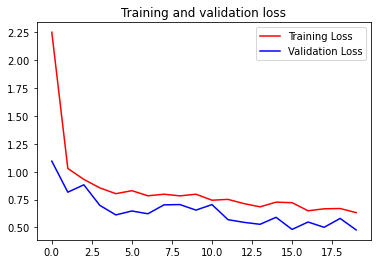

In [106]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()